# Machine Learning

This notebook is supposed to be an introduction to Machine Learning with Python for DSRers, who may have no clue in ML, but know a little bit of Python.

It's the first time this notebook is being used, mainly because:

- Everything in one large notebook instead of several smaller ones.

- To harmonize the content of the notebooks with the order of the slides.

- Substantially extending on typical interview questions, which I think is the main result you will get from "all the theory".

In [37]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Autoreload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
'''# Standard settings I do
plt.rcParams['savefig.dpi'] = 80

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 20, 12
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = False # True activates latex output in fonts!
plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"
'''

# import jtplot
from jupyterthemes import jtplot
jtplot.style('chesterish')

What are you going to learn? Well, mainly working with __scikit-learn__ and being able to use the models learned in the slides in a concrete implementation as well as judging your results (and assuring they are correct).

### Datasets 

We will start to work with the scikit learn datasets. There are three groups: `make` for synthetic, `load` for small datasets contained in sklearn, and `fetch` for (possibly larger) datasets that have to be downloaded once (they are usually stored in your user directory)

In [39]:
from sklearn.datasets import fetch_20newsgroups, load_iris, make_blobs

# use ?? command to get help on certain things
# fetch_20newsgroups??

In [40]:
# this is conversion method between seaborn and matplotlib
def sns_palette_to_cmap(palette):
    from matplotlib.colors import ListedColormap
    return ListedColormap(palette.as_hex())

def get_cmap(n_classes):
    return sns_palette_to_cmap(sns.hls_palette(n_classes))

In [41]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, random_state=42)
n_classes = len(np.unique(y))
cmap = get_cmap(n_classes) # just to keep things standard
print(X.shape)

(200, 2)


Text(0.5,1,'Three blobs in the plane')

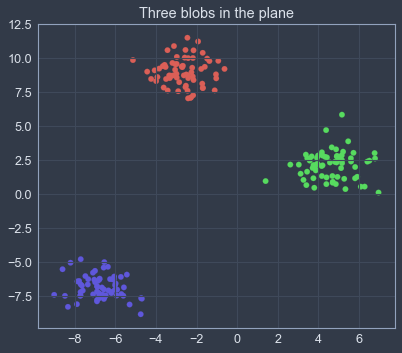

In [42]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.title("Three blobs in the plane")

Let's try the first model we have discussed: k-NN:

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(5)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

With `score` one gets the metric the model was optimized for.

In [29]:
print("Model Accuracy: %.3f" % (knn.score(X, y)))

Model Accuracy: 1.000


In [30]:
# this is a function that allows us to plot a decision surface

def plot_decision_surface(X, y, clf, n_classes=None):
    
    if n_classes is None:
        n_classes = len(np.unique(y))

    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    colmap_light = sns_palette_to_cmap(sns.hls_palette(n_classes))
    colmap_dark = sns_palette_to_cmap(sns.hls_palette(n_classes, l=.3, s=.6))
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=colmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colmap_dark)
    plt.axis('tight')

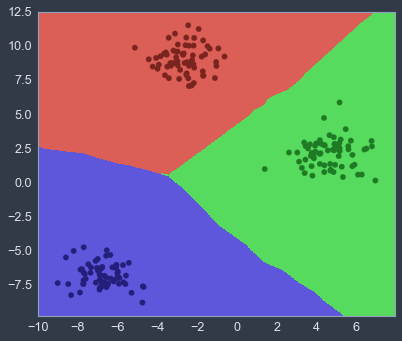

In [31]:
plot_decision_surface(X, y, knn)

_Exercise_: Build a k-NN classifier for this data set.
Judge visually whether this will be good.

In [32]:
from sklearn.datasets import make_gaussian_quantiles

# now we're going to call the make_gaussian quantiles method
X, y = make_gaussian_quantiles(n_samples=200, n_classes=5, random_state=42)
n_classes = len(np.unique(y))
cmap = get_cmap(n_classes) # just to keep things standard
print(X.shape)
print(y.shape)

(200, 2)
(200,)


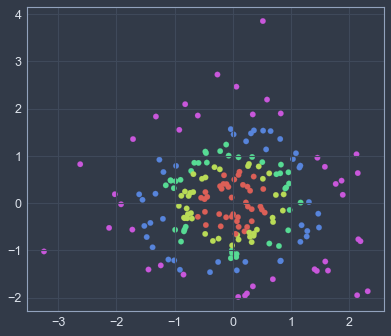

In [34]:
# this shows the randomly created features of the gaussian quantiles
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

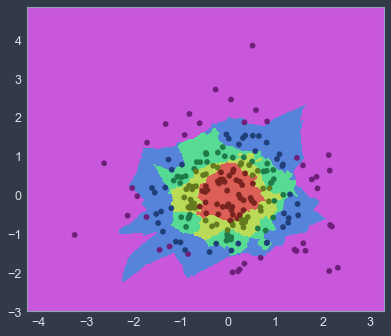

In [35]:
# now we develop a K-NN model and fit the data to it
knn = KNeighborsClassifier(5)
knn.fit(X, y)
plot_decision_surface(X, y, knn)

In [ ]:
knn.score(X,y)

In [ ]:
# let's define a function that can calculate how many of our predictions are wrong

def misccalssification(X, y, model):
    # select instances in the data set where the model is wrong
    y_predict = model.predict(X)
    index_correct = (y == y_predict) # this is called masking, shows where one value equals another at the same index in a vector
    # index_correct is a bollean output length of total indices
    # ~ is an inversion. because we asked for when the predictions were right, but we want to show when they were wrong
    return X[~index_correct],y[~index_correct]

# have a look at what you've misclassified
(X_miss, y_miss) = misccalssification(X,y,knn)
print(X_miss.shape)
print(y_miss)
print(y_miss.shape)

# this adds another plot on top that shows X's on those that have been misclassified
plt.scatter(X_miss[:,0],X_miss[:,1],c="black", marker='x', s=220)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

# let's visualise the points we got wrong
#plt.scatter(X_miss[:,0],X_miss[:,1],c=y_miss, cmap=cmap)

## Linear Regression 

In [8]:
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()

In [9]:
print("Features %s" % boston.feature_names)
print(boston.DESCR)

Features ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX    

In [10]:
X, y = boston.data, boston.target
print(X.shape, y.shape)

(506, 13) (506,)


In [11]:
df = pd.DataFrame(boston.data)
df.columns = ['crime_rate','res_land_zoned','industry','charles_river','nox','avg_num_rooms','prop_bf_1940','dst_emply_center','rd_highway_idx','tax_rate','stdnt_tchr_ratio','prop_blacks','low_status_pct']

In [12]:
df.head(10)

,crime_rate,res_land_zoned,industry,charles_river,nox,avg_num_rooms,prop_bf_1940,dst_emply_center,rd_highway_idx,tax_rate,stdnt_tchr_ratio,prop_blacks,low_status_pct
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


## Least Squares 

In [13]:
# the normaliasation step is included in least squres
from sklearn.linear_model import LinearRegression

In [14]:
least_squares = LinearRegression(normalize=True, )

In [15]:
least_squares.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

Text(0.5,1,'Weights of least squares')

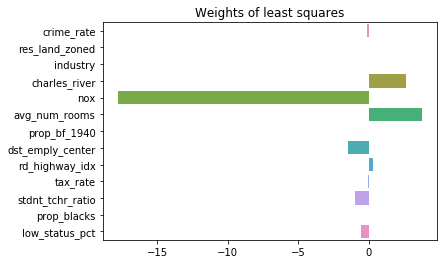

In [18]:
# this shows that the higher the air pollution in the area is, the lower the house price is
sns.barplot(x=least_squares.coef_, y=df.columns, orient="h")
plt.title("Weights of least squares")

But how good is our model on the data?

In [19]:
# this is a way 
least_squares.score(X, y) # R^2

0.7406077428649427

In [20]:
LinearRegression??

The `score` method always returns the metric the model has been optimized for. The `sklearn.metrics` package contains all kinds of metrics.

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
y_pred = least_squares.predict(X) # computes the predictions
mean_squared_error(y, y_pred)

21.8977792176875

## An unpleasant surprise

But in reality our model has to form predictions on *unseen* data. Let's model this situation.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
print(X_train.shape, X_test.shape, X.shape)

(379, 13) (127, 13) (506, 13)


In [25]:
least_squares.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [26]:
print("Train score: %.4f" % least_squares.score(X_train, y_train))
print("Test score: %.4f" % least_squares.score(X_test, y_test))

Train score: 0.7481
Test score: 0.6840


The test score is way worse! This is the effect of overfitting.

*Exercise*: Compute the MSE for the train and test set. How does it compare to the situation before?

In [27]:
# %load ./solutions/mse.py
y_pred_train = least_squares.predict(X_train)
y_pred_test = least_squares.predict(X_test)

print("Train MSE: %.4f" % mean_squared_error(y_pred_train, y_train))
print("Test MSE: %.4f" % mean_squared_error(y_pred_test, y_test))

Train MSE: 22.3385
Test MSE: 22.1317


## Other models...

Try other models, play with the parameters and try to beat the best score!

*Extra*: Inspect the features not used by the Lasso model and remove them from the feature set. Does this improve the performance of all (others included!) models?

In [28]:
from sklearn.linear_model import Ridge # L_2
from sklearn.linear_model import Lasso # L_1
from sklearn.linear_model import ElasticNet # convex(L_1, L_2)

In [29]:
# to begin, you'd manually change alpha
lasso = Lasso(alpha=5e-2, normalize=True)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.31541428, -0.        ,
        4.18252691, -0.        , -0.        , -0.        , -0.        ,
       -0.55187472,  0.00475577, -0.49931538])

In [31]:
print("Train score: %.4f" % lasso.score(X_train, y_train))
print("Test score: %.4f" % lasso.score(X_test, y_test))

Train score: 0.6803
Test score: 0.6296


In [32]:
used_features = lasso.coef_ != 0.0
print(used_features)

[False False False  True False  True False False False False  True  True
  True]


In [33]:
X_reduced = X[:, used_features]

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, random_state=42)

$\lambda$ must be lowered because there is less noise to learn from.

In [34]:
lasso = Lasso(alpha=0.01, normalize=True)
lasso.fit(X_train_red, y_train_red)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
print("Train score: %.4f" % lasso.score(X_train_red, y_train_red))
print("Test score: %.4f" % lasso.score(X_test_red, y_test_red))

Train score: 0.7096
Test score: 0.6319


## Polynomial Regression

In [36]:
# ppolynomial is always going to be more powerful than linear on base data
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [37]:
# you can use this pipeline like any other normaliser
# if you use a pipeline, the implementation and deployment become easier. They're somehow saved?

clf_pipe = make_pipeline(
    PolynomialFeatures(degree=5), # this will define how curvy the boundary is
    ElasticNet(alpha=0.001, 
               l1_ratio=0.3, 
               normalize=True, 
               random_state=42, 
               max_iter=1000)
)

clf_pipe.fit(X_train, y_train)

/Users/garethjones/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('elasticnet', ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.3,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False))])

In [42]:
# use this to save models in the h5 format!
from sklearn.externals import joblib
joblib.dump(clf_pipe, "pipeline_v01.pkl", compress=5)
my_pipe = joblib.load("pipeline_v01.pkl")
my_pipe

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('elasticnet', ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.3,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False))])

In [43]:
poly_feats = PolynomialFeatures(degree=5)
X_poly = poly_feats.fit_transform(X)

In [44]:
X.shape

(506, 13)

In [45]:
X_poly.shape

(506, 8568)

In [46]:
print("Train score: %.4f" % clf_pipe.score(X_train, y_train))
print("Test score: %.4f" % clf_pipe.score(X_test, y_test))

Train score: 0.9424
Test score: 0.8450


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, clf_pipe.predict(X_test))

In [47]:
# this is where you can analyse parts of the pipeline
clf_pipe.steps

[('polynomialfeatures',
  PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)),
 ('elasticnet',
  ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.3,
        max_iter=1000, normalize=True, positive=False, precompute=False,
        random_state=42, selection='cyclic', tol=0.0001, warm_start=False))]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

# for each model, try different degrees or alphas, this is a brute force approach
# there are 45 different combinations of each of these parameters
params = {
    "polynomialfeatures__degree": [1, 2, 3, 4, 5],
    "elasticnet__alpha": [10**i for i in range(-2, 0)],
    "elasticnet__l1_ratio": np.linspace(0.1, 0.9, 3) # this creates an array with 3 equidistant numbers
}

clf_pipe = make_pipeline(
    PolynomialFeatures(),
    ElasticNet(normalize=True, random_state=42)
)

grid = GridSearchCV(clf_pipe, params, scoring="r2", verbose=True, cv=3)
grid.fit(X_train, y_train)

grid.cv_results_

grid.best_estimator_

# Linear Classification

## Preamble the data set

We are using Fisher's famous <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris data set</a>. The goal is to classify flowers from the Iris family into one of three species, that look as follows:

<table>
<tr>
<td> <img src="figures/iris_setosa.jpg" width="200" style="height:150px"/> </td>
<td> <img src="figures/iris_versicolor.jpg" width="200" style="height:150px"/> </td>
<td> <img src="figures/iris_virginica.jpg" width="200" style="height:150px"/> </td>
</tr>

<tr> 
<td>Iris Setosa</td>
<td>Iris Versicolor</td>
<td>Iris Virginica</td>
</tr>
</table>

Our data set contains 50 flowers from each class, thus 150 in total. There are four features, the length and width of the petal (dt. Kronblatt) and sepal (dt. Kelchblatt) in centimetres.

<img src="figures/petal_sepal.jpg" width="400" style="height:300px"/>

The data set is distributed with sci-kit learn, the only thing we have to do is to important a function and call it.

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
print(type(X))
print(X.shape)

print("First three rows of data\n %s" % X[:3])
print("First three labels: %s" % (y[:3])

In [ ]:
import numpy as np

In [ ]:
np.ravel(X)

 Not only do we get the input matrix $X \in \mathbb{R}^{150 \times 4}$ and target $y \in \mathbb{R}^{150}$, but also meta information such as what the class labels $0, 1, 2$ stand for and what the features (i.e. columns of $X$) correspond to.

In [ ]:
print(data.target_names)
print(data.feature_names)

As a first step we focus our analysis on the first two variables, the sepal length and sepal width. Since we obtain a representation of the data in two dimensions, we are able to plot it. 

In [ ]:
X_2 = X[:, :2]
y_2 = y

In [ ]:
# We write a function so we can reuse it later.
def generate_scatter_plot(X, y):
    class_names = data.target_names
    class_colours = ['blue','yellow','green']

    fig = plt.figure(figsize=(12, 6)) # increase size of plot
    
    for i, class_colour in enumerate(class_colours):
        # plot the points only of this class label
        plt.scatter(X[y == i, 0], X[y == i, 1], c=class_colour, label=class_names[i]) 

    plt.xlabel(data.feature_names[0]) # label the axis
    plt.ylabel(data.feature_names[1])
    plt.legend(loc="best") # with legend

generate_scatter_plot(X_2, y)

## Binary Classification

We do a "setosa vs others" classification.

In [ ]:
from copy import copy
y_setosa = copy(y)
y_setosa[(y == 2) | (y == 1)] = 0
y_setosa[y == 0] = 1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_setosa, random_state=42)

In [ ]:
clf = LogisticRegression(C=1, penalty="l2")
clf.fit(X_train, y_train)

In [ ]:
print("Train-Score: %.4f, Test-Accuracy: %.4f" % (clf.score(X_train, y_train), clf.score(X_test, y_test)))

## Multi-class Classification

Now try the multi-class problem. Look up the slides for the multi-class logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
n_samples = X_train.shape[0]

In [ ]:
clf = LogisticRegression(multi_class="multinomial", 
                         penalty="l2",
                         random_state=42,
                         solver="newton-cg")

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_test, 
                      clf.predict(X_test), 
                      #labels=data.feature_names,
                      target_names=data.target_names
                     )

print(report)

# Evaluation

The goal of this lab is to introduce you the most important techniques for evaluating your trained models. The motivation is to be able to select the model that has the best (expected) out-of-sample prediction and to assess the quality of the model.

## 1. Model Selection in a holdout setting

We start with the <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris</a> data set. In a nut shell the iris data set consists out of $4$ features (sepal length, sepal width, petal length, petal width) of three kinds of flowers in the iris family (iris setosa, iris versicolor, iris virginica). It was first used by Fisher to introduce linear discriminant analysis. Our version of the data set has 150 data points with 50 for each class.

In [91]:
from sklearn.datasets import load_iris

iris = load_iris()
print("Loaded %d data points" % len(iris.data))

X, y = iris.data, iris.target

print("Class labels: %s" % list(zip(range(3), iris.target_names)))
X.shape

Loaded 150 data points
Class labels: [(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]


(150, 4)

As a first example we try to classify the iris versicolor with the help of the first two features (that makes visualisation simpler as we do not know PCA yet). 

In [96]:
X_versi = X[:, :2]
y_versi = np.zeros(len(y))
y_versi[y == 1] = 1
X_versi.shape

(150, 2)

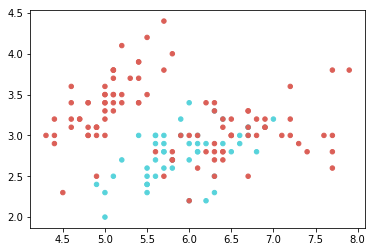

In [93]:
plt.scatter(X_versi[:, 0], X_versi[:, 1], c=y_versi, cmap=get_cmap(2), s=20)

The scatter plot shows that this is going to be a hard seperation problem as the classifier has to predict the red points. 

We split the data into a train and test (holdout) set.

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_versi, y_versi, random_state=3)


The following function is a little visualization helper that draws the values of the decision function on a heat map given a matplotlib axe.

In [84]:
def show_decision_function(clf, ax):
    xx, yy = np.meshgrid(np.linspace(4.5, 8, 200), np.linspace(1.5, 4.0, 200))
    try:
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    except AttributeError:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]

    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=plt.cm.jet)
    ax.set_xlim(4.5, 8)
    ax.set_ylim(1.5, 4.0)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100)

Text(0.5,1,'Logistic Regression')

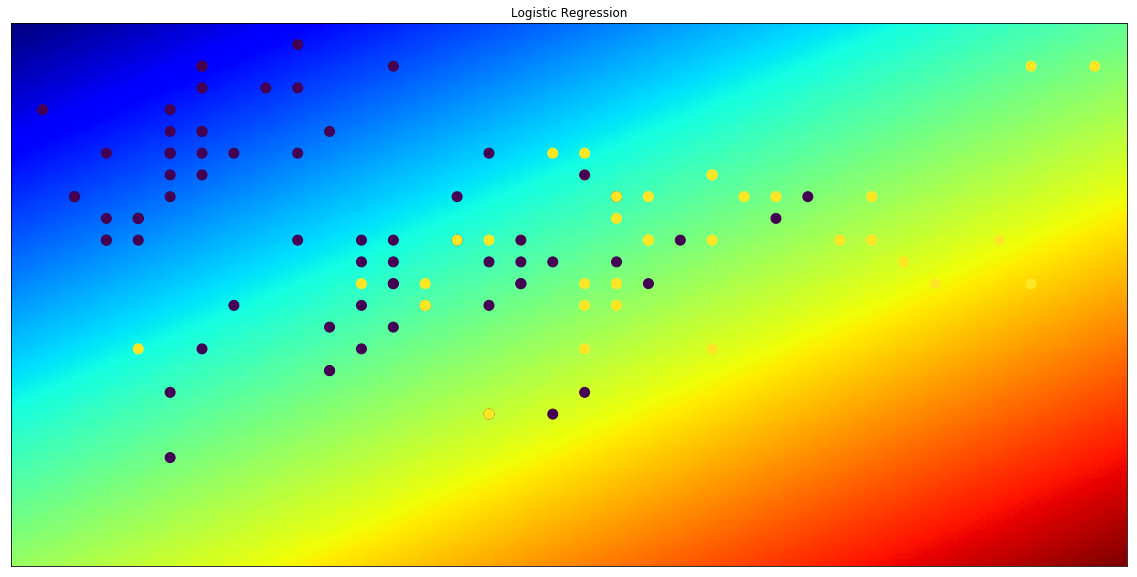

In [85]:
from sklearn.linear_model import LogisticRegression

# we call this clf because it's a classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
show_decision_function(clf, ax)
ax.set_title('Logistic Regression')

The scikit-learn metrics package offers the basic evaluation routines.

In [86]:
from sklearn import metrics

y_pred = clf.predict(X_test)

print("Test Precision: %.3f" % metrics.precision_score(y_test, y_pred)) # this is how many positive predictions it got right, (i.e. were there lots of fasle positives?) 1 is best
print("Test Recall: %.3f" % metrics.recall_score(y_test, y_pred)) # this is how many of all real positives the model predicted (i.e. were there lots of false negatives?), 1 is best
print("Test F-Score: %.3f" % metrics.f1_score(y_test, y_pred)) # this is a combined precision and recall score, again 1 is best. Use this to evaluate how well the model is doing

Test Precision: 0.588
Test Recall: 0.909
Test F-Score: 0.714


Recalling the definition of precision and recall the numbers mean that 2/3 of the positive predictions are correct and that 1/2 of the test iris versicolor has been found by the classifier. The F-Score is then just the arithmetic mean of both (7/12).

To plot the ROC curve the decision function needs to be explicitly evaluated. The following code block also contains a helper function to plot ROC curves.

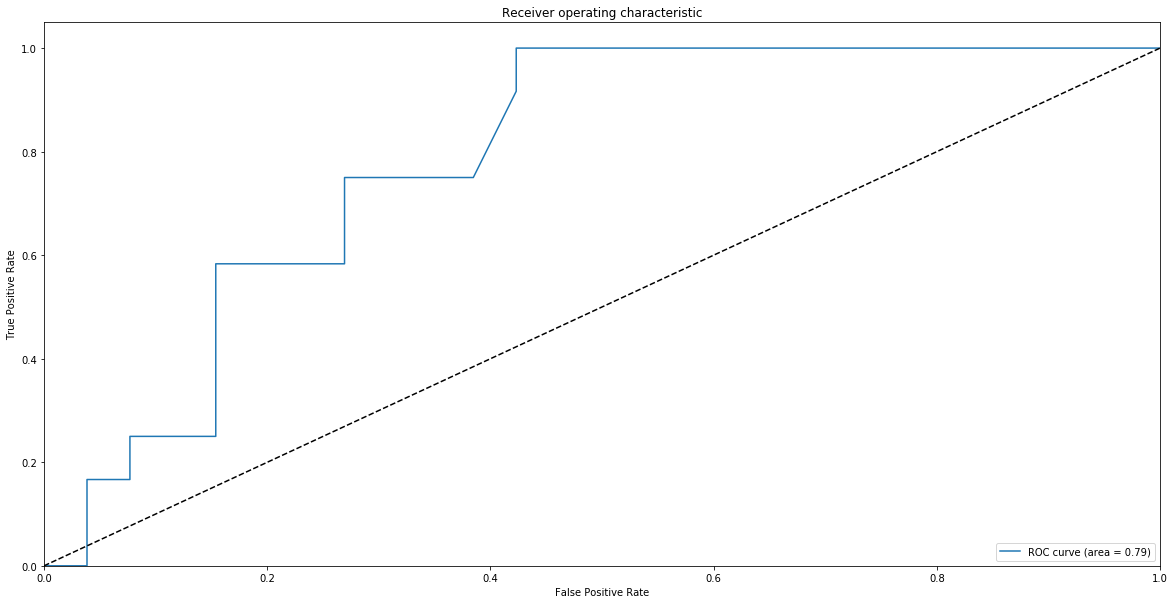

In [78]:
y_score = clf.decision_function(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_score, pos_label=1)

# helper to plot ROC curves
def plot_roc_curves(fprs, tprs):
    fig = plt.figure(figsize=(20,10))
    for fpr, tpr in zip(fprs, tprs):
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc_curves([fpr], [tpr])

<b>Ex. 1.1</b>: Train four different classifiers (on the train/test data we used in the prior example) and put them into the list 'clfs' (you can add elements to a list via the 'append' method. Analyse the visualisations that are created by the code blocks after (Is there a uniquely best classifier?). Set the $\gamma$ parameter to $1$ and vary the $C$. Before trying out values be sure to check the <a href="http://scikit-learn.org/stable/modules/svm.html">SVM</a> documentation in scikit-learn.

Hint: Set a name to your classifier, i.e. clf.name = "Some description" to keep track of what you have done.

In [ ]:
# Exercise 1.1
from sklearn.svm import SVC
clfs = []

In [ ]:
# %load solutions/eval_11.py
# Solution Exercise 1.1

In [ ]:
# This code visualises the decision functions of the four different classifiers.

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for clf, ax in zip(clfs, axes.ravel()):
    show_decision_function(clf, ax)
    ax.set_title(clf.name)

In [ ]:
# draw the roc curves.

fprs, tprs = [], []

for clf in clfs:
    y_score = clf.decision_function(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_score, pos_label=1)
    fprs.append(fpr)
    tprs.append(tpr)
    
plot_roc_curves(fprs, tprs)

## 2. Cross-Validation

Having only 150 samples it seems like a waste to waste 30% of the training samples into the holdout set. To avoid this we can use CV - as presented in the lecture - to trade computational power for a better use of our data. 

The following code creates a list of masks, where every mask can be used as an index set to select the test samples.

In [ ]:
def create_kfold_mask(num_samples, k):
    masks = []
    fold_size = num_samples / k
    
    for i in range(k):
        mask = np.zeros(num_samples, dtype=bool)
        mask[i*fold_size:(i+1)*fold_size] = True
        masks.append(mask)
        
    return masks

masks = create_kfold_mask(150, 10)
plt.matshow(masks)

mask = masks[0]
print(X_versi[mask]) # selects the test sample
print(len(X_versi[~mask])) # selects training sample, ~ is binary negation

Since the data is sorted by the labels the $k$-fold CV will likely have trouble with class imbalances in the some cases. A random shuffle solves this problem.

In [ ]:
print(y_versi)
num_sample = len(X_versi)
np.random.seed(3)
permutation = np.random.permutation(num_sample)
X_versi, y_versi = X_versi[permutation], y_versi[permutation]

<b>Ex. 2.1</b>: Implement the function scores = cv_k_fold_classifier(clf, k, X, y) that fits the classifier clf on the k-fold cvs of X and y. It returns two lists of scores: the training and test scores of each fold. Interpret the results of the code block after.

In [ ]:
# Exercise 2.1

def cv_k_fold_classifier(clf, k, X, y):
    training_scores = []
    test_scores = []
        
    # Your code

    return training_scores, test_scores
    

In [ ]:
# Solution Exercise 2.1

def cv_k_fold_classifier(clf, k, X, y):
    training_scores = []
    test_scores = []
   
    # Your code
    n = len(X)
    masks = create_kfold_mask(n, k)
    
    for mask in masks:
        X_train, y_train = X[~mask], y[~mask]
        clf.fit(X_train, y_train)
        training_scores.append(clf.score(X_train, y_train))
        
        X_test, y_test = X[mask], y[mask]
        test_scores.append(clf.score(X_test, y_test))
    
    return training_scores, test_scores

In [ ]:
# Train SVM with complete data now and use k-fold CV
# still needs to shuffle data
X_versi_2 = X[permutation]

y_versi_2 = np.zeros(len(y))
y_versi_2[y == 1] = 1
y_versi_2 = y_versi_2[permutation]

Cs = np.linspace(0.01, 10, 100)

training_scores = []
test_scores = []


for C in Cs:
    clf = SVC(C=C)
    clf.name = "SVM with C = {}".format(C)
    training_score, test_score = map(lambda xs: np.mean(xs), cv_k_fold_classifier(clf, 10, X_versi_2, y_versi_2))
    training_scores.append(training_score)
    test_scores.append(test_score)
    
plt.figure(figsize=(20, 10))
plt.plot(Cs, training_scores, label='Training Error')
plt.plot(Cs, test_scores, label = 'Test Error')
plt.xlim(0, 10)
plt.ylim(0.8, 1.00)
plt.xlabel('C')
plt.ylabel('Error')
plt.title('RBF SVM classification error of Iris versicolor on whole Iris data set')
plt.legend()
plt.show()   

Scikit-learn also contains procedures for creating CV. One of them is stratified k-fold CV, which is k-fold while ensuring that there is no local class imbalance. 

In [ ]:
import sklearn.cross_validation as cv

# Helper to plot scikit CV

def plot_cv(cv):
    masks = []
    for train, test in cv: # this shows you how to use the cv results!
        # i.e. X_train, y_train = X[train], y[train]
        mask = np.zeros(cv.n, dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.matshow(masks)
    
kfold = cv.StratifiedKFold(y, n_folds=10) # using it on the original multi-class labels
plot_cv(kfold)

It is interesting to note how the folds partition into the regions of the three class labels.

In [ ]:
# Other CV methods do not require labels only the length of the labels
plot_cv(cv.KFold(len(y), n_folds=10)) # like we implemented
plot_cv(cv.ShuffleSplit(len(y), n_iter=10, test_size=0.3)) # like training_test_split with test 30% of data

<b>Ex. 2.2</b>: Using the whole dataset build any classifier that detects iris virginica. 
Try two cross validation strategies:

a) stratified 2-fold CV

b) LOOCV (leave one out cross validation)

Choose the best models in a) and b). Compare those two models, which one is likely to be better? What do the ROC curves tell you? Should an additional holdout set be used?

Hint: The accuracy is the mean of the accuracy on every test set. In LOOCV this is the one test sample. Thus, the overall accuracy is equivalent to the ratio of folds in which the test sample was correctly predicted. 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

base_clf = LogisticRegression(C=1, solver="saga", multi_class="multinomial")

param = {
    "C": [0.03, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ("l1", "l2")
}

# you could run .fit on clf
clf = GridSearchCV(base_clf, param, scoring="accuracy", cv=ShuffleSplit(3), verbose=1)
scores = cross_val_score(clf, X, y, scoring="accuracy", cv=ShuffleSplit(5), n_jobs=-1, verbose=1)

print("%.4f (±%.4f)" % (np.mean(scores), np.std(scores)))

In [ ]:
clf.fit(X, y)
y_pred = clf.predict_proba(X)

mask = y_pred >= 0.5
y_pred[mask] = 1
y_pred[~mask] = 0
y_pred

In [ ]:
# Exercise 2.2

In [ ]:
# Solution Exercise 2.2

virgin_idx = y == 2
y_virgin = np.zeros(len(y))
y_virgin[virgin_idx] = 1

from sklearn import grid_search
from sklearn.cross_validation import LeaveOneOut, StratifiedKFold

parameters = {
    'kernel':('linear', 'rbf'), 
    'C':[0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]
}

svc = SVC()

# a)
clf = grid_search.GridSearchCV(svc, parameters, scoring='accuracy', cv=StratifiedKFold(y_virgin, 2))
clf.fit(X, y_virgin) 

best_clf_a = clf.best_estimator_

y_score = best_clf_a.decision_function(X)
fpr_a, tpr_a, _ = metrics.roc_curve(y_virgin, y_score, pos_label=1)

print("Best Classifier (2-fold): %s" % best_clf_a)
print("Best Accuracy (2-fold): %.4f" % clf.best_score_)
# b)
clf = grid_search.GridSearchCV(svc, parameters, scoring='accuracy', cv=LeaveOneOut(150))
clf.fit(X, y_virgin)   

best_clf_b = clf.best_estimator_

y_score = best_clf_b.decision_function(X)
fpr_b, tpr_b, _ = metrics.roc_curve(y_virgin, y_score, pos_label=1)
plot_roc_curves([fpr_a, fpr_b], [tpr_a, tpr_b])

print("Best Classifier (LOOCV): %s" % best_clf_b)
print("Best Accuracy (LOOCV): %.4f" % clf.best_score_)

### Validation curves

In [ ]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## 3. Wrapping up: Politician recognition

This section is optional and supposed to be a playground to try out things presented in the lectures so far. Running the next cell loads the data set that loads about 1300 images of politicians of the era of the war in Iraq. As this data set is about 200 MB this can take a while.

In [ ]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                                       data_home='datasets')
print("Loaded %d data points with %d features" % (lfw_people.data.shape[0], lfw_people.data.shape[1]))
print("Names of politicians: %s" % lfw_people.target_names)

The following code plots some images, feel free to use it.

In [ ]:
fig = plt.figure(figsize=(12, 8))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[]) # xticks / yticks = [] ensures no border
    ax.imshow(lfw_people.images[i], cmap=plt.cm.bone)
    ax.set_title(lfw_people.target_names[lfw_people.target[i]])

<b>Ex. 3.1 (Optional)</b>: Train a classifier for the politician recognition problem. Ideally, you should solve the multiclass problem and use CV and scoring techniques. You can also train a binary classifier to detect one of the politicians.

Show what you can!

In [ ]:
# simple train test split (can be used, but you can also do CV based approaches).
X_train, X_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target, random_state=3)